# 3. Reducing dimensions with PCA

This script demonstrates how to perform dimensionality reduction using Principal Component Analysis (PCA)
on a dataset of extracted features. It visualizes the normalized features, the principal components, and how
much variance each component explains.

Make sure to have the required `features.npz` file in the correct path.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 3.1 Load and Normalize the Features

In [3]:
FEATURE_TYPE = 'designed'  # 'psd' or 'designed'
NORMALIZE = True # True or False, whether to normalize the features

In [4]:
# load the features
data = np.load('../example/features.npz')
timestamps_hrs = data['timestamps_features']
if FEATURE_TYPE == 'psd':
    features = data['psd_features']
elif FEATURE_TYPE == 'designed':
    features = data['designed_features']

In [ ]:
# minmax normalize the features by column
if NORMALIZE:
    features = (features - np.min(features, axis=0)) / (np.max(features, axis=0) - np.min(features, axis=0))

Text(0, 0.5, 'Feature Index')

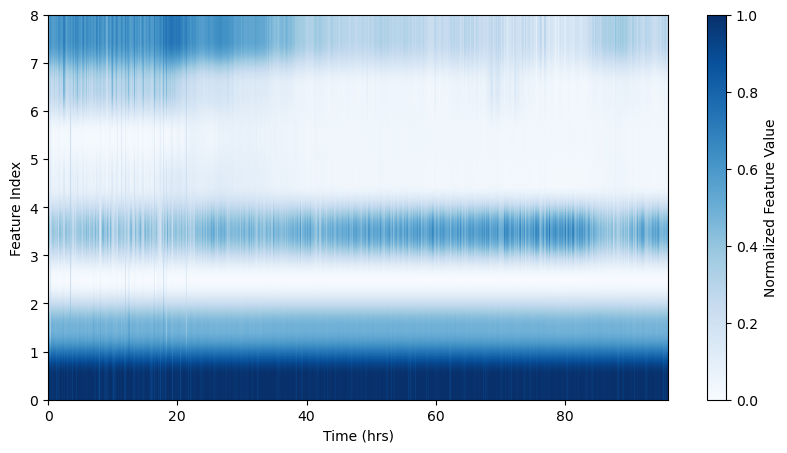

In [35]:
# visualize the features
plt.figure(figsize=(10, 5))
plt.imshow(features.T, aspect='auto', origin='lower', extent=[timestamps_hrs[0], timestamps_hrs[-1], 0, features.shape[1]], cmap='Blues')
plt.colorbar(label='Normalized Feature Value')
plt.xlabel('Time (hrs)')
plt.ylabel('Feature Index')

## 3.2 Apply PCA and visualize the results

In [29]:
N_COMPONENTS = 8 # number of PCA components, maximum depends on the number of features

In [30]:
# reduce the dimensionality of the features
pca = PCA(n_components=N_COMPONENTS)
pca_features = pca.fit_transform(features)

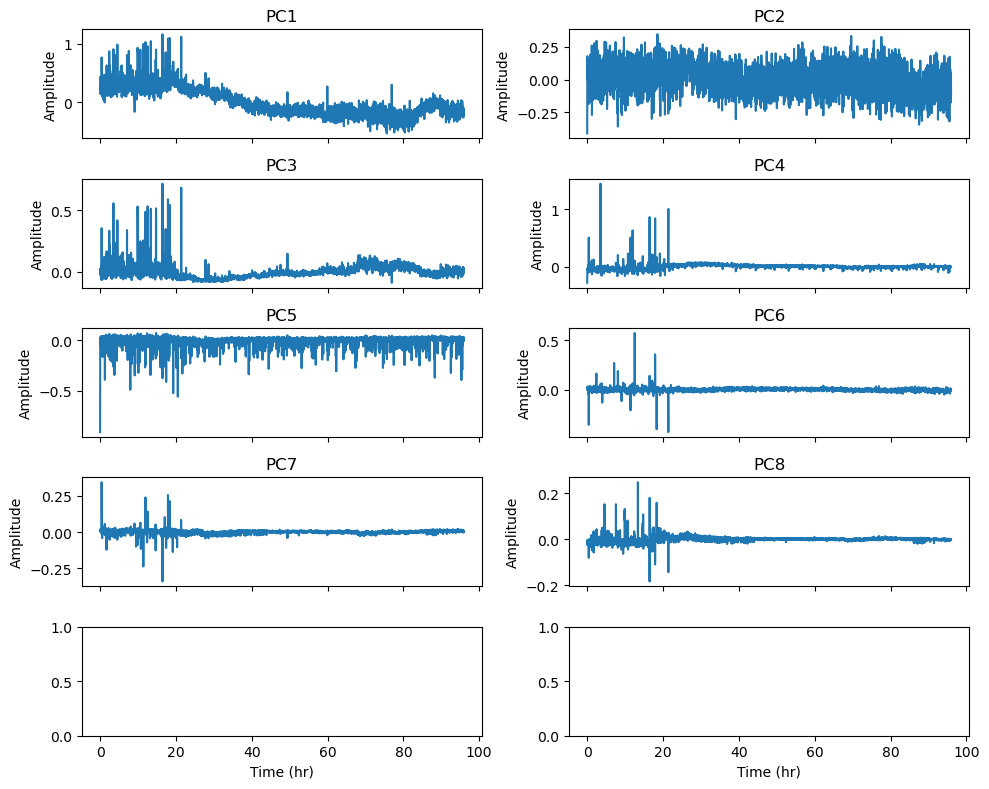

In [32]:
fig, ax = plt.subplots(N_COMPONENTS // 2+1, 2, figsize=(10, N_COMPONENTS), sharex=True)
for i in range(N_COMPONENTS):
    ax[i // 2, i % 2].plot(timestamps_hrs, pca_features[:, i])
    ax[i // 2, i % 2].set_title(f'PC{i + 1}')
    ax[i // 2, i % 2].set_ylabel('Amplitude')

ax[-1, -1].set_xlabel('Time (hr)')
ax[-1, 0].set_xlabel('Time (hr)')
plt.tight_layout()

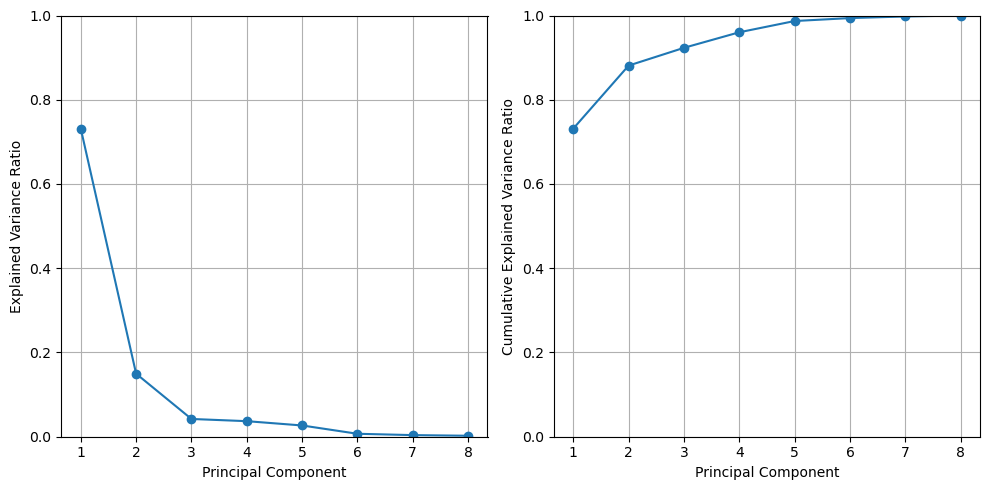

In [33]:
# show the explained variance and the cumulative explained variance
explained_variance = pca.explained_variance_ratio_
fig, axes = plt.subplots(1,2,figsize=(10, 5), sharex=True)
axes[0].plot(range(1, 9), explained_variance, marker='o')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_xticks(range(1, 9))
axes[0].set_xticklabels(range(1, 9))
axes[0].set_ylim(0, 1)
axes[0].grid()

axes[1].plot(range(1, 9), np.cumsum(explained_variance), marker='o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_ylim(0, 1)
axes[1].grid()
plt.tight_layout()
plt.show()

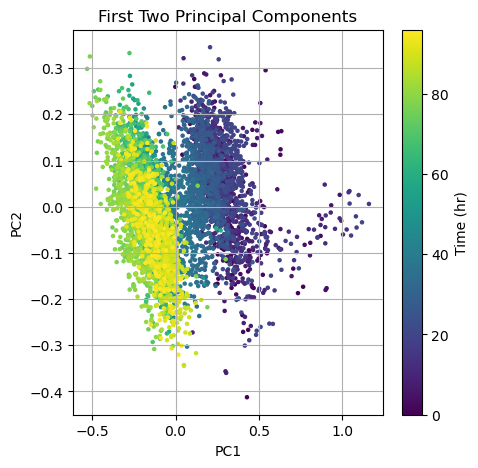

In [34]:
# show the first two principal components
fig, ax = plt.subplots(figsize=(5, 5))
#ax.scatter(pca_features[:, 0], pca_features[:, 1], s=5)
img = ax.scatter(pca_features[:, 0], pca_features[:, 1], s=5, c=timestamps_hrs, cmap='viridis')
ax.set_title('First Two Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.grid()
#ax.set_aspect('equal', adjustable='box')
# add color bar
cbar = plt.colorbar(img)
cbar.set_label('Time (hr)')
plt.show()
